## Objective

The objective of this project is to build a robust machine learning model to predict the presence of heart disease using structured clinical patient data. This includes performing detailed exploratory data analysis (EDA), identifying data quality issues, engineering meaningful features, and evaluating multiple classification models using cross-validation to determine the most reliable predictive approach.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
heart = pd.read_csv("heart.csv")

In [5]:
heart.shape # rows-> 918, columns->12

(918, 12)

In [52]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [53]:
heart.columns #give columns/features

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [54]:
heart.info()#types + non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [55]:
heart.isnull().sum() #cheaking null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [56]:
heart.isna().sum()#cheacking missing values NaN


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [57]:
heart.duplicated().sum()

np.int64(0)

In [58]:
heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [59]:
print(heart["HeartDisease"].value_counts())#getting particular feature data distribution
print(heart["HeartDisease"].value_counts(normalize=True) * 100)#distribution in percentage

HeartDisease
1    508
0    410
Name: count, dtype: int64
HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64


In [60]:
heart.Sex.value_counts() #more males than females(males->725 and females->193)

Sex
M    725
F    193
Name: count, dtype: int64

In [61]:
num_cols = heart.select_dtypes(include=["int64", "float64"]).columns
cat_cols = heart.select_dtypes(include=["object"]).columns

print("Numeric Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))


Numeric Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [62]:
#spelling check
for col in cat_cols:
    print("\nColumn:", col)
    print(heart[col].unique())



Column: Sex
['M' 'F']

Column: ChestPainType
['ATA' 'NAP' 'ASY' 'TA']

Column: RestingECG
['Normal' 'ST' 'LVH']

Column: ExerciseAngina
['N' 'Y']

Column: ST_Slope
['Up' 'Flat' 'Down']


In [63]:
#Value counts for each categorical column
for col in cat_cols:
    print("\n=========================")
    print("Column:", col)
    print(heart[col].value_counts())



Column: Sex
Sex
M    725
F    193
Name: count, dtype: int64

Column: ChestPainType
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Column: RestingECG
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Column: ExerciseAngina
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Column: ST_Slope
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [64]:
#statistical data
heart.describe()

#RestingBP and Cholesterol can't be zero(fake values or missing values)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [65]:
print("RestingBP zeros:", (heart["RestingBP"] == 0).sum())
print("Cholesterol zeros:", (heart["Cholesterol"] == 0).sum())


RestingBP zeros: 1
Cholesterol zeros: 172


In [66]:
for col in num_cols:
    print("\nColumn:", col)
    print("Min:", heart[col].min())
    print("Max:", heart[col].max())



Column: Age
Min: 28
Max: 77

Column: RestingBP
Min: 0
Max: 200

Column: Cholesterol
Min: 0
Max: 603

Column: FastingBS
Min: 0
Max: 1

Column: MaxHR
Min: 60
Max: 202

Column: Oldpeak
Min: -2.6
Max: 6.2

Column: HeartDisease
Min: 0
Max: 1


In [69]:
for col in cat_cols:
    print("\n=========================")
    print("Feature:", col)

    # cross-tab counts
    print(pd.crosstab(heart[col], heart["HeartDisease"]))

    # cross-tab percentage
    print("\nPercentage:")
    print(pd.crosstab(heart[col], heart["HeartDisease"], normalize="index") * 100)

#crosstab makes a table that counts how many times two things happen together.Like a “combo-count table”.



Feature: Sex
HeartDisease    0    1
Sex                   
F             143   50
M             267  458

Percentage:
HeartDisease          0          1
Sex                               
F             74.093264  25.906736
M             36.827586  63.172414

Feature: ChestPainType
HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20

Percentage:
HeartDisease           0          1
ChestPainType                      
ASY            20.967742  79.032258
ATA            86.127168  13.872832
NAP            64.532020  35.467980
TA             56.521739  43.478261

Feature: RestingECG
HeartDisease    0    1
RestingECG            
LVH            82  106
Normal        267  285
ST             61  117

Percentage:
HeartDisease          0          1
RestingECG                        
LVH           43.617021  56.382979
Normal        48.369565  51.630435
ST            34.269663  65.730337

Feature: ExerciseAn

In [74]:
pd.crosstab(heart["Cholesterol"] == 0, heart["HeartDisease"], normalize="index") * 100
#pd.crosstab(heart["Cholesterol"] == 0, heart["HeartDisease"]) 

HeartDisease,0,1
Cholesterol,,
False,52.278820,47.721180
True,11.627907,88.372093


In [71]:
pd.crosstab(heart["RestingBP"] == 0, heart["HeartDisease"], normalize="index") * 100


HeartDisease,0,1
RestingBP,,
False,44.711014,55.288986
True,0.000000,100.000000


In [72]:
for col in ["ExerciseAngina", "ST_Slope", "RestingECG", "Sex"]:
    print("\n", col)
    print(pd.crosstab(heart[col], heart["HeartDisease"], normalize="index") * 100)



 ExerciseAngina
HeartDisease            0          1
ExerciseAngina                      
N               64.899452  35.100548
Y               14.824798  85.175202

 ST_Slope
HeartDisease          0          1
ST_Slope                          
Down          22.222222  77.777778
Flat          17.173913  82.826087
Up            80.253165  19.746835

 RestingECG
HeartDisease          0          1
RestingECG                        
LVH           43.617021  56.382979
Normal        48.369565  51.630435
ST            34.269663  65.730337

 Sex
HeartDisease          0          1
Sex                               
F             74.093264  25.906736
M             36.827586  63.172414


## ASY chest pain has very high heart disease %

## ExerciseAngina=Y has much higher disease %

## ST_Slope=Flat/Down has more disease

In [68]:
heart.groupby("HeartDisease")[num_cols].mean()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
HeartDisease,,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049,0.0
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0


In [75]:
pd.crosstab(heart["ChestPainType"], heart["HeartDisease"], normalize="index") * 100


HeartDisease,0,1
ChestPainType,,
ASY,20.967742,79.032258
ATA,86.127168,13.872832
NAP,64.532020,35.467980
TA,56.521739,43.478261


In [76]:
heart.groupby("HeartDisease")[["Age", "MaxHR", "Oldpeak", "Cholesterol", "RestingBP"]].agg(["mean", "median"])


Age              MaxHR          Oldpeak         \
                   mean median        mean median      mean median   
HeartDisease                                                         
0             50.551220   51.0  148.151220  150.0  0.408049    0.0   
1             55.899606   57.0  127.655512  126.0  1.274213    1.2   

             Cholesterol          RestingBP         
                    mean median        mean median  
HeartDisease                                        
0             227.121951  227.0  130.180488  130.0  
1             175.940945  217.0  134.185039  132.0

dataset’s strongest predictors

**Top Strongest**

ST_Slope

ExerciseAngina

ChestPainType

Oldpeak

MaxHR

**Medium**

Age

RestingECG

FastingBS

**Weak-ish**

RestingBP

Cholesterol (because missingness ruins it)

## Visualisation

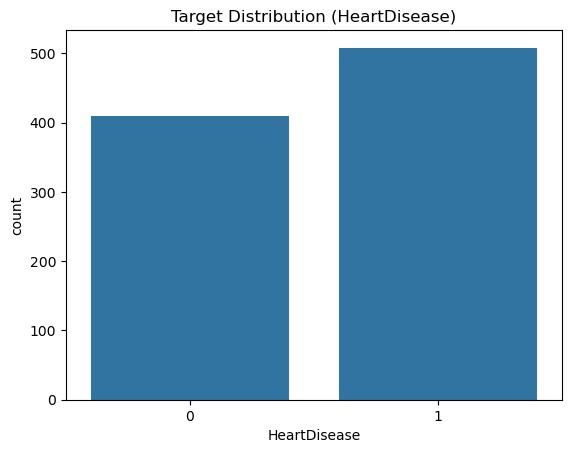

In [77]:
sns.countplot(x="HeartDisease", data=heart)
plt.title("Target Distribution (HeartDisease)")
plt.show()


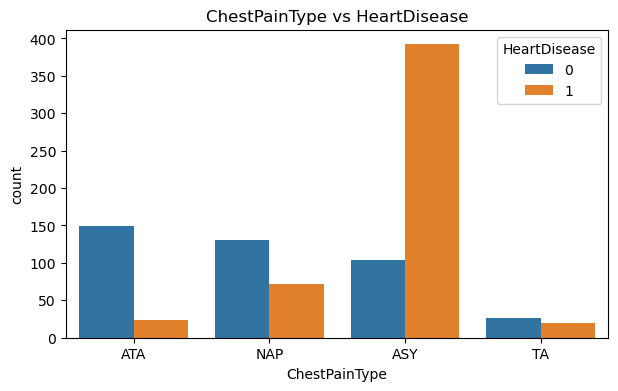

In [78]:
plt.figure(figsize=(7,4))
sns.countplot(x="ChestPainType", hue="HeartDisease", data=heart)
plt.title("ChestPainType vs HeartDisease")
plt.show()


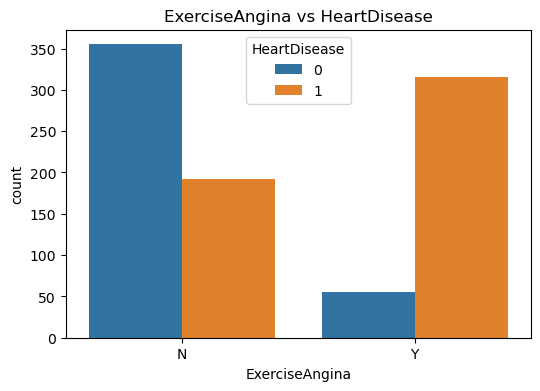

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(x="ExerciseAngina", hue="HeartDisease", data=heart)
plt.title("ExerciseAngina vs HeartDisease")
plt.show()


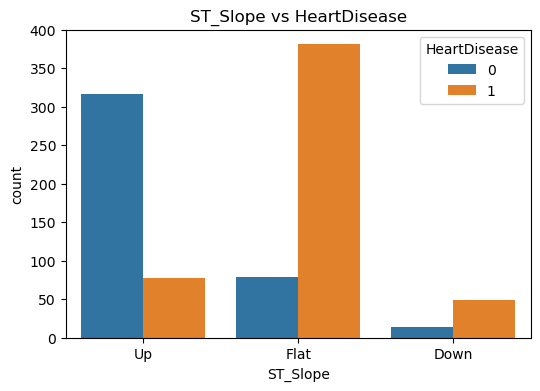

In [81]:
plt.figure(figsize=(6,4))
sns.countplot(x="ST_Slope", hue="HeartDisease", data=heart)
plt.title("ST_Slope vs HeartDisease")
plt.show()


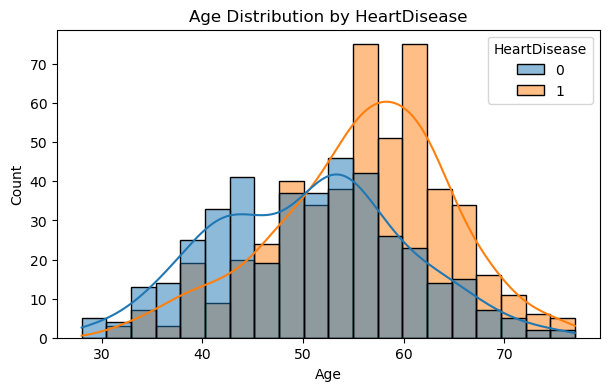

In [82]:
plt.figure(figsize=(7,4))
sns.histplot(data=heart, x="Age", hue="HeartDisease", kde=True, bins=20)
plt.title("Age Distribution by HeartDisease")
plt.show()


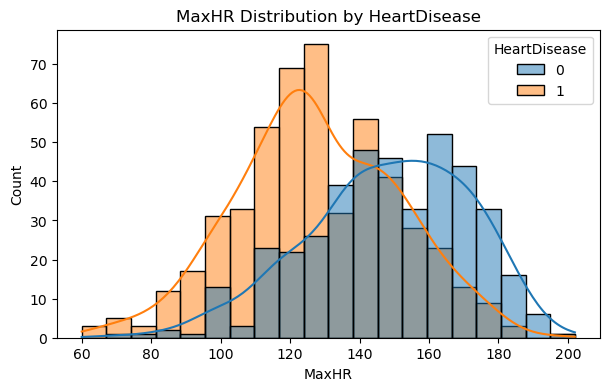

In [83]:
plt.figure(figsize=(7,4))
sns.histplot(data=heart, x="MaxHR", hue="HeartDisease", kde=True, bins=20)
plt.title("MaxHR Distribution by HeartDisease")
plt.show()


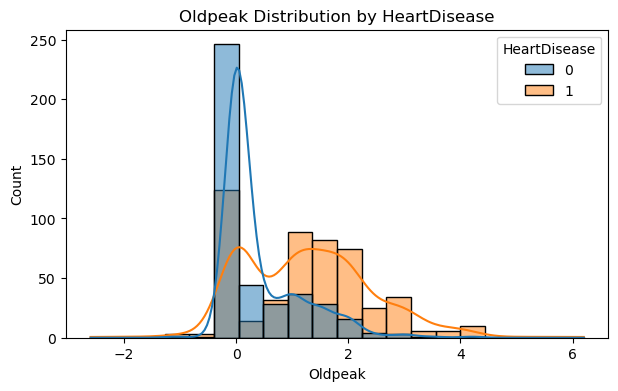

In [84]:
plt.figure(figsize=(7,4))
sns.histplot(data=heart, x="Oldpeak", hue="HeartDisease", kde=True, bins=20)
plt.title("Oldpeak Distribution by HeartDisease")
plt.show()


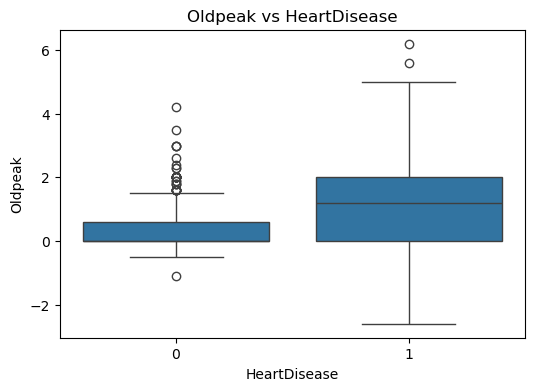

In [85]:
plt.figure(figsize=(6,4))
sns.boxplot(x="HeartDisease", y="Oldpeak", data=heart)
plt.title("Oldpeak vs HeartDisease")
plt.show()


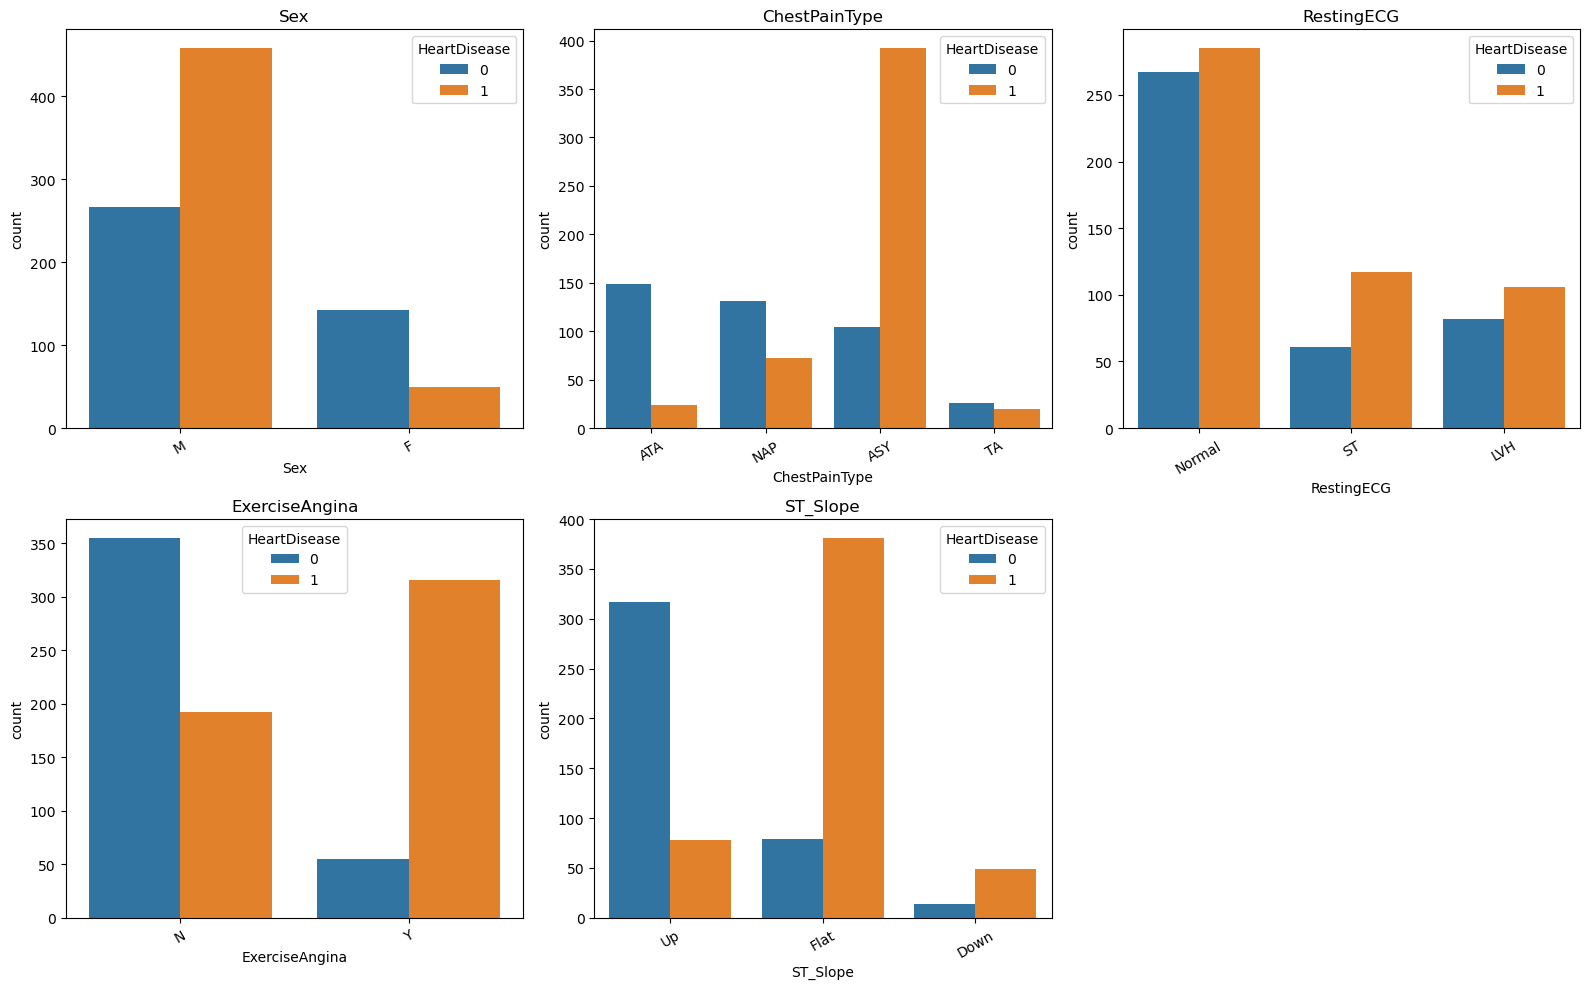

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

plt.figure(figsize=(16,10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue="HeartDisease", data=heart)
    plt.title(col)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()


In [107]:
#Biggest issue: Cholesterol = 0 (172 rows)
x=heart["Cholesterol_missing"] = (heart["Cholesterol"] == 0).astype(int)
chol_median = heart.loc[heart["Cholesterol"] != 0, "Cholesterol"].median()
heart.loc[heart["Cholesterol"] == 0, "Cholesterol"] = chol_median


In [108]:
bp_median = heart.loc[heart["RestingBP"] != 0, "RestingBP"].median()
heart.loc[heart["RestingBP"] == 0, "RestingBP"] = bp_median


## Model Training

In [6]:
X = heart.drop("HeartDisease", axis=1) #all features
y = heart["HeartDisease"] #traget 


In [121]:
num_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "Cholesterol_missing"]

cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]



In [7]:
# Splitting of data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [123]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [124]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


## LogisticRegression

In [129]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", LogisticRegression())])


In [130]:
model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [131]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8913043478260869

Confusion Matrix:
 [[70 12]
 [ 8 94]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        82
           1       0.89      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [134]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


ROC-AUC: 0.9324485891917742


In [135]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    model,   # your pipeline (preprocess + logistic regression)
    X, y,
    cv=cv,
    scoring="roc_auc"
)

print("ROC-AUC scores:", scores)
print("Mean ROC-AUC:", scores.mean())
print("Std ROC-AUC:", scores.std())


ROC-AUC scores: [0.94488283 0.93687231 0.90937351 0.93914513 0.90751026]
Mean ROC-AUC: 0.927556808765525
Std ROC-AUC: 0.015835121738512748


In [136]:
acc_scores = cross_val_score(
    model,
    X, y,
    cv=cv,
    scoring="accuracy"
)

print("Accuracy scores:", acc_scores)
print("Mean Accuracy:", acc_scores.mean())


Accuracy scores: [0.89130435 0.88586957 0.85326087 0.87431694 0.84153005]
Mean Accuracy: 0.869256355428843


## Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

tree_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", DecisionTreeClassifier(random_state=42))
])


In [138]:
tree_auc = cross_val_score(
    tree_model,
    X, y,
    cv=cv,
    scoring="roc_auc"
)

tree_acc = cross_val_score(
    tree_model,
    X, y,
    cv=cv,
    scoring="accuracy"
)

print("Decision Tree Mean ROC-AUC:", tree_auc.mean())
print("Decision Tree Mean Accuracy:", tree_acc.mean())


Decision Tree Mean ROC-AUC: 0.7839538616702416
Decision Tree Mean Accuracy: 0.7842658588738416


## RandomForest

In [142]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(
        n_estimators=500,
        random_state=42
    ))
])


In [143]:
rf_auc = cross_val_score(
    rf_model,
    X, y,
    cv=cv,
    scoring="roc_auc"
)

rf_acc = cross_val_score(
    rf_model,
    X, y,
    cv=cv,
    scoring="accuracy"
)

print("Random Forest Mean ROC-AUC:", rf_auc.mean())
print("Random Forest Mean Accuracy:", rf_acc.mean())


Random Forest Mean ROC-AUC: 0.9258362098763678
Random Forest Mean Accuracy: 0.8692682347350915


In [144]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Mean Accuracy": [acc_scores.mean(), tree_acc.mean(), rf_acc.mean()],
    "Mean ROC-AUC": [scores.mean(), tree_auc.mean(), rf_auc.mean()]
})

results


,Model,Mean Accuracy,Mean ROC-AUC
0,Logistic Regression,0.869256,0.927557
1,Decision Tree,0.784266,0.783954
2,Random Forest,0.869268,0.925836


## Testing

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

gb_auc = cross_val_score(gb_model, X, y, cv=cv, scoring="roc_auc")
gb_acc = cross_val_score(gb_model, X, y, cv=cv, scoring="accuracy")

print("Gradient Boosting Mean Accuracy:", gb_acc.mean())
print("Gradient Boosting Mean ROC-AUC:", gb_auc.mean())


Gradient Boosting Mean Accuracy: 0.8681812782133523
Gradient Boosting Mean ROC-AUC: 0.9225267648716091


In [148]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

gb_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

hgb_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", HistGradientBoostingClassifier(random_state=42))
])
models = {
    "LogReg": model,
    "RandomForest": rf_model,
    "GradBoost": gb_model,
    "HistGradBoost": hgb_model
}

for name, m in models.items():
    auc = cross_val_score(m, X, y, cv=cv, scoring="roc_auc").mean()
    acc = cross_val_score(m, X, y, cv=cv, scoring="accuracy").mean()
    print(name, "| AUC:", round(auc, 4), "| ACC:", round(acc, 4))


LogReg | AUC: 0.9276 | ACC: 0.8693
RandomForest | AUC: 0.9258 | ACC: 0.8693
GradBoost | AUC: 0.9225 | ACC: 0.8682
HistGradBoost | AUC: 0.9229 | ACC: 0.8529


In [153]:
from sklearn.model_selection import GridSearchCV

logreg_grid = {
    "classifier__C": [0.01, 0.1, 1, 5, 10, 50],
    "classifier__penalty": ["l2"],
    "classifier__class_weight": [None, "balanced"]
}

logreg_search = GridSearchCV(
    model,
    param_grid=logreg_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

logreg_search.fit(X, y)

print("Best ROC-AUC:", logreg_search.best_score_)
print("Best Params:", logreg_search.best_params_)
#accuracy 0.8758077928248991

Best ROC-AUC: 0.9297687874956793
Best Params: {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__penalty': 'l2'}


In [150]:
rf_grid = {
    "classifier__n_estimators": [200, 500],
    "classifier__max_depth": [None, 4, 6, 10],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", 0.5]
}

rf_search = GridSearchCV(
    rf_model,
    param_grid=rf_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

rf_search.fit(X, y)

print("Best ROC-AUC:", rf_search.best_score_)
print("Best Params:", rf_search.best_params_)


Best ROC-AUC: 0.9301904437215601
Best Params: {'classifier__max_depth': 6, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


In [151]:
print("Best Logistic ROC-AUC:", logreg_search.best_score_)
print("Best RF ROC-AUC:", rf_search.best_score_)


Best Logistic ROC-AUC: 0.9297687874956793
Best RF ROC-AUC: 0.9301904437215601


In [154]:
rf_grid = {
    "classifier__n_estimators": [200, 500],
    "classifier__max_depth": [None, 4, 6, 10],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", 0.5]
}

rf_search = GridSearchCV(
    rf_model,
    param_grid=rf_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

rf_search.fit(X, y)

print("Best auc:", rf_search.best_score_)
print("Best Params:", rf_search.best_params_)

Best auc: 0.8736279401282964
Best Params: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 500}


In [160]:
best_logreg = logreg_search.best_estimator_
best_rf = rf_search.best_estimator_
#best_rf
#best_logreg

In [163]:
best_logreg.fit(X, y)



,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [162]:
best_rf.fit(X, y)

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [164]:
import joblib

joblib.dump(best_logreg, "logreg_heart_model.pkl")
joblib.dump(best_rf, "rf_heart_model.pkl")

print("Saved both models successfully!")


Saved both models successfully!


In [165]:
loaded_rf = joblib.load("rf_heart_model.pkl")

sample = X.iloc[[0]]  # first row as a sample input
print("Prediction:", loaded_rf.predict(sample)[0])
print("Probability:", loaded_rf.predict_proba(sample)[0][1])


Prediction: 0
Probability: 0.006160965787812818


In [168]:
import pandas as pd
from sklearn.model_selection import cross_val_score

logreg_best = logreg_search.best_estimator_
rf_best = rf_search.best_estimator_

logreg_acc_tuned = cross_val_score(logreg_best, X, y, cv=cv, scoring="accuracy").mean()
rf_acc_tuned = cross_val_score(rf_best, X, y, cv=cv, scoring="accuracy").mean()

summary = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Before Tuning - Mean Accuracy": [0.869256, 0.869268],
    "Before Tuning - Mean ROC-AUC": [0.927557, 0.9258],
    "After Tuning - Mean Accuracy": [logreg_acc_tuned, rf_acc_tuned],
    "After Tuning - Mean ROC-AUC": [logreg_search.best_score_, rf_search.best_score_]
})

summary


,Model,Before Tuning - Mean Accuracy,Before Tuning - Mean ROC-AUC,After Tuning - Mean Accuracy,After Tuning - Mean ROC-AUC
0,Logistic Regression,0.869256,0.927557,0.875808,0.929769
1,Random Forest,0.869268,0.925800,0.873628,0.873628
